In [1]:
import cv2
import os

import matplotlib.pyplot as plt
import numpy as np
import enum
import tqdm

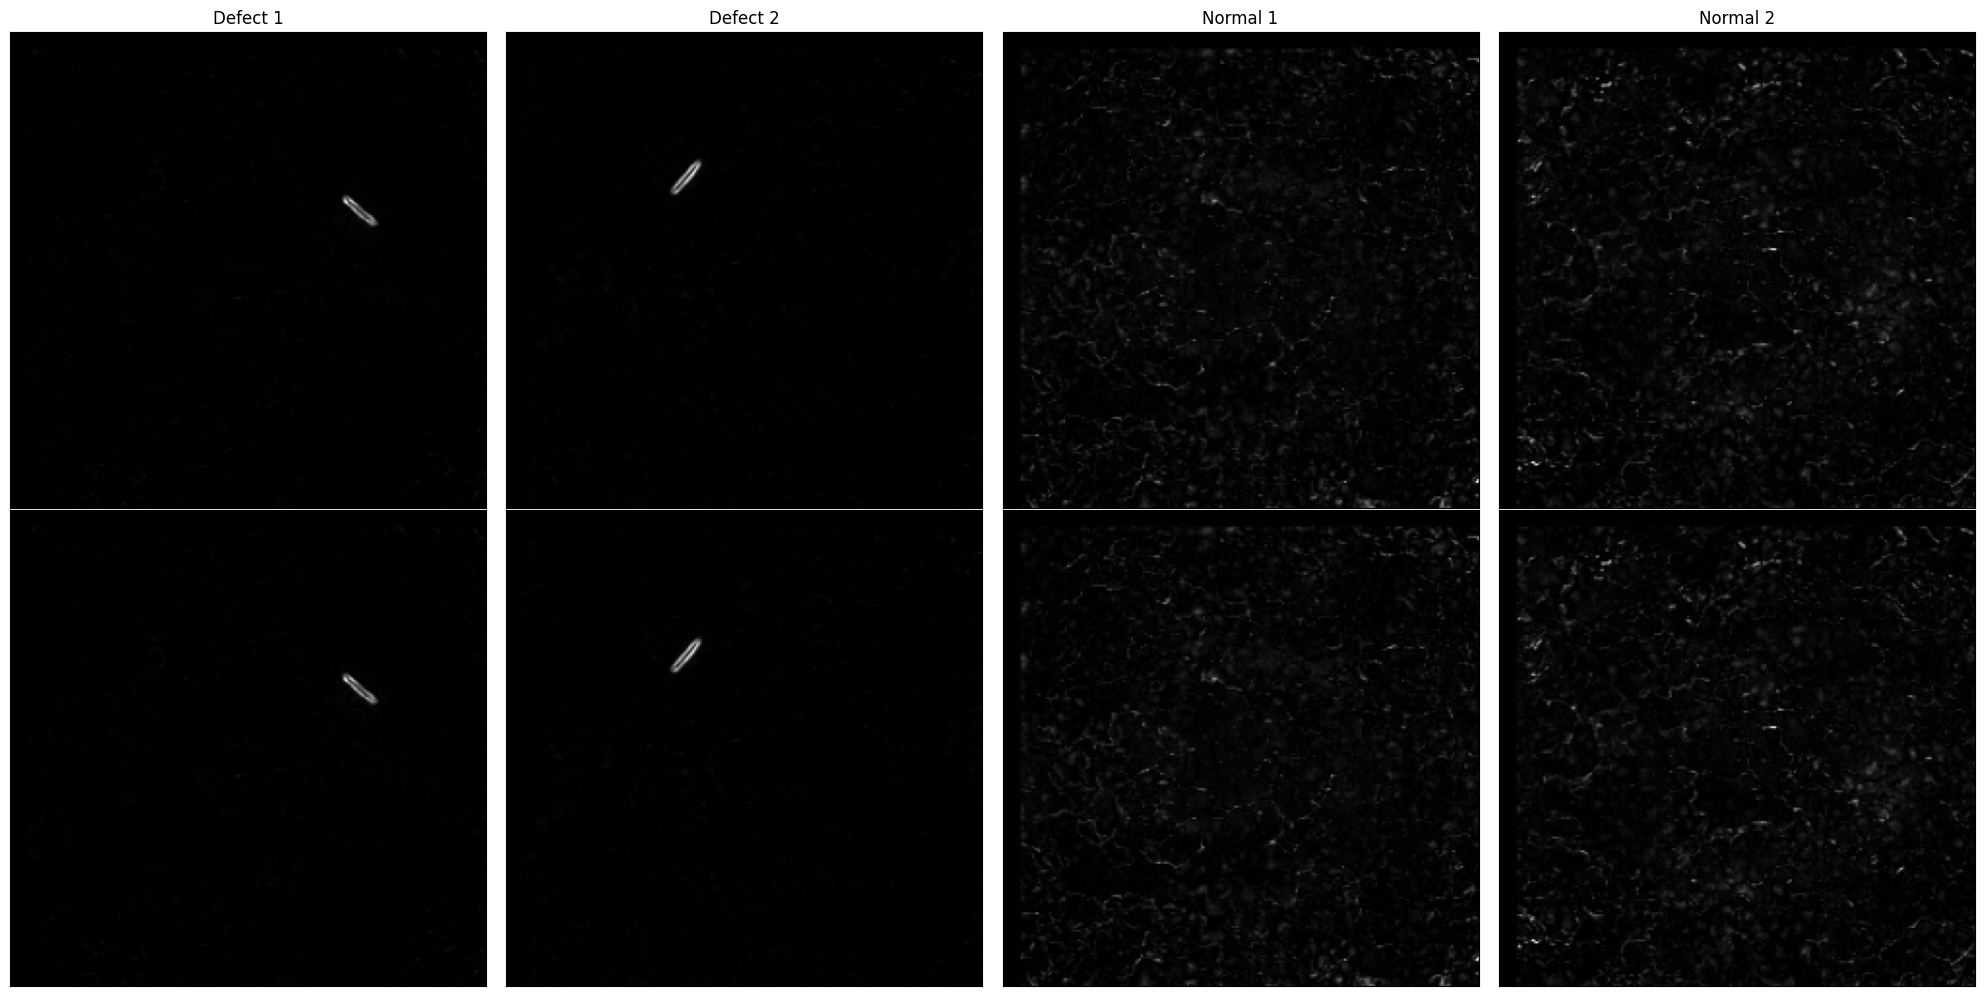

In [2]:
# ----------------------- Plot defect and normal images ---------------------- #
images = []
images.append(cv2.imread('test6/error_1.png'))
images.append(cv2.imread('test6/error_2.png'))
images.append(cv2.imread('test6/error_48.png'))
images.append(cv2.imread('test6/error_49.png'))

def plot_images(images, titles = None, time=0):
    fig, axes = plt.subplots(len(images)//4, 4, figsize=(20, 5*len(images)//4))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_xticks([]); ax.set_yticks([])
    
    if titles is not None:
        for ax, title in zip(axes.flat, titles):
            ax.set_title(title)
    else:
        if len(axes.shape) == 1:
            axes[0].set_title('Defect 1')
            axes[1].set_title('Defect 2')
            axes[2].set_title('Normal 1')
            axes[3].set_title('Normal 2')
        else:
            axes[0,0].set_title('Defect 1')
            axes[0,1].set_title('Defect 2')
            axes[0,2].set_title('Normal 1')
            axes[0,3].set_title('Normal 2')
    


    plt.tight_layout()
    if time == 0:
        plt.show()
    else:
        plt.pause(time)

plot_images(images+images)

In [21]:



def confusionMatrix(image, threshold,threshold2=10):

    image = cv2.GaussianBlur(image, (5, 5), 0)
    image_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY )[1]
    # print("Threshold: ", threshold, "Non-zero pixels: ", cv2.countNonZero(image_threshold))
    if cv2.countNonZero(image_threshold) > threshold2:
        return 1
    else:
        return 0



def Threshold():
    # Get every image in the folder "test/"
    image_folder = "test"
    
    pred2 = []
    for threshold2 in tqdm.tqdm(range(5, 51, 2)):  # Loop over threshold2 values
        pred = []
        for i in range(0, 256, 2):
            conf = []
            j = 0
            for filename in os.listdir(image_folder):
                if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
                    image_path = os.path.join(image_folder, filename)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    result = confusionMatrix(image, i, threshold2)
                    conf.append(result)
                    j += 1
            pred.append(conf)
        pred2.append(pred)
    return pred2

pred = Threshold()

  0%|          | 0/23 [00:00<?, ?it/s]

100%|██████████| 23/23 [07:48<00:00, 20.37s/it]


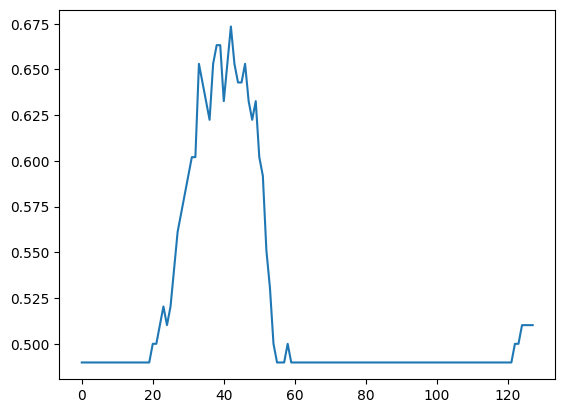

In [30]:
truth = [1] * 48 + [0] * 50
acc2 = []
for i in range(len(pred)):
    acc = []
    for k in range(len(pred[i])):
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        for j in range(len(pred[i][k])):
            if pred[i][k][j] == 1 and truth[j] == 1:
                tp += 1
            elif pred[i][k][j] == 0 and truth[j] == 0:
                tn += 1
            elif pred[i][k][j] == 1 and truth[j] == 0:
                fp += 1
            elif pred[i][k][j] == 0 and truth[j] == 1:
                fn += 1
        acc.append((tp + tn) / (tp + tn + fp + fn))
    acc2.append(acc)

plt.plot(acc)
plt.show()


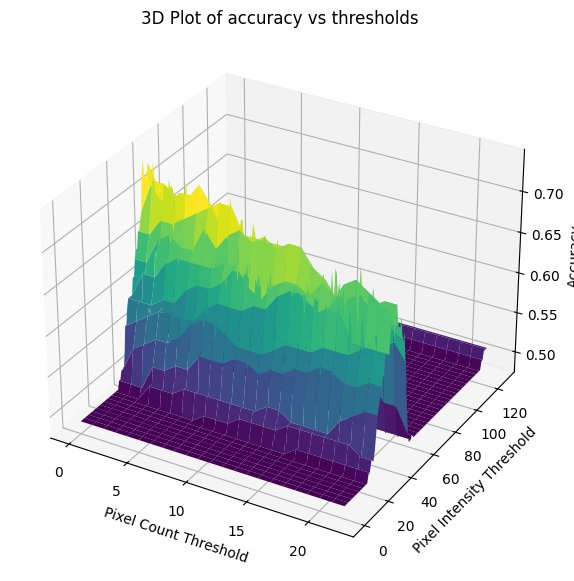

Highest accuracy: 0.7448979591836735
Best combination - Threshold: 52, Threshold2: 1


In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = range(len(acc2))  # Threshold2 values
y = range(len(acc2[0]))  # Threshold values
X, Y = np.meshgrid(x, y)
Z = np.array(acc2).T  # Transpose to align dimensions

ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Pixel Count Threshold')
ax.set_ylabel('Pixel Intensity Threshold')
ax.set_zlabel('Accuracy')
ax.set_title('3D Plot of accuracy vs thresholds')

plt.show()

max_acc = np.max(Z)
max_indices = np.unravel_index(np.argmax(Z, axis=None), Z.shape)
best_threshold2 = X[max_indices]
best_threshold = Y[max_indices]

print(f"Highest accuracy: {max_acc}")
print(f"Best combination - Threshold: {best_threshold}, Threshold2: {best_threshold2}")


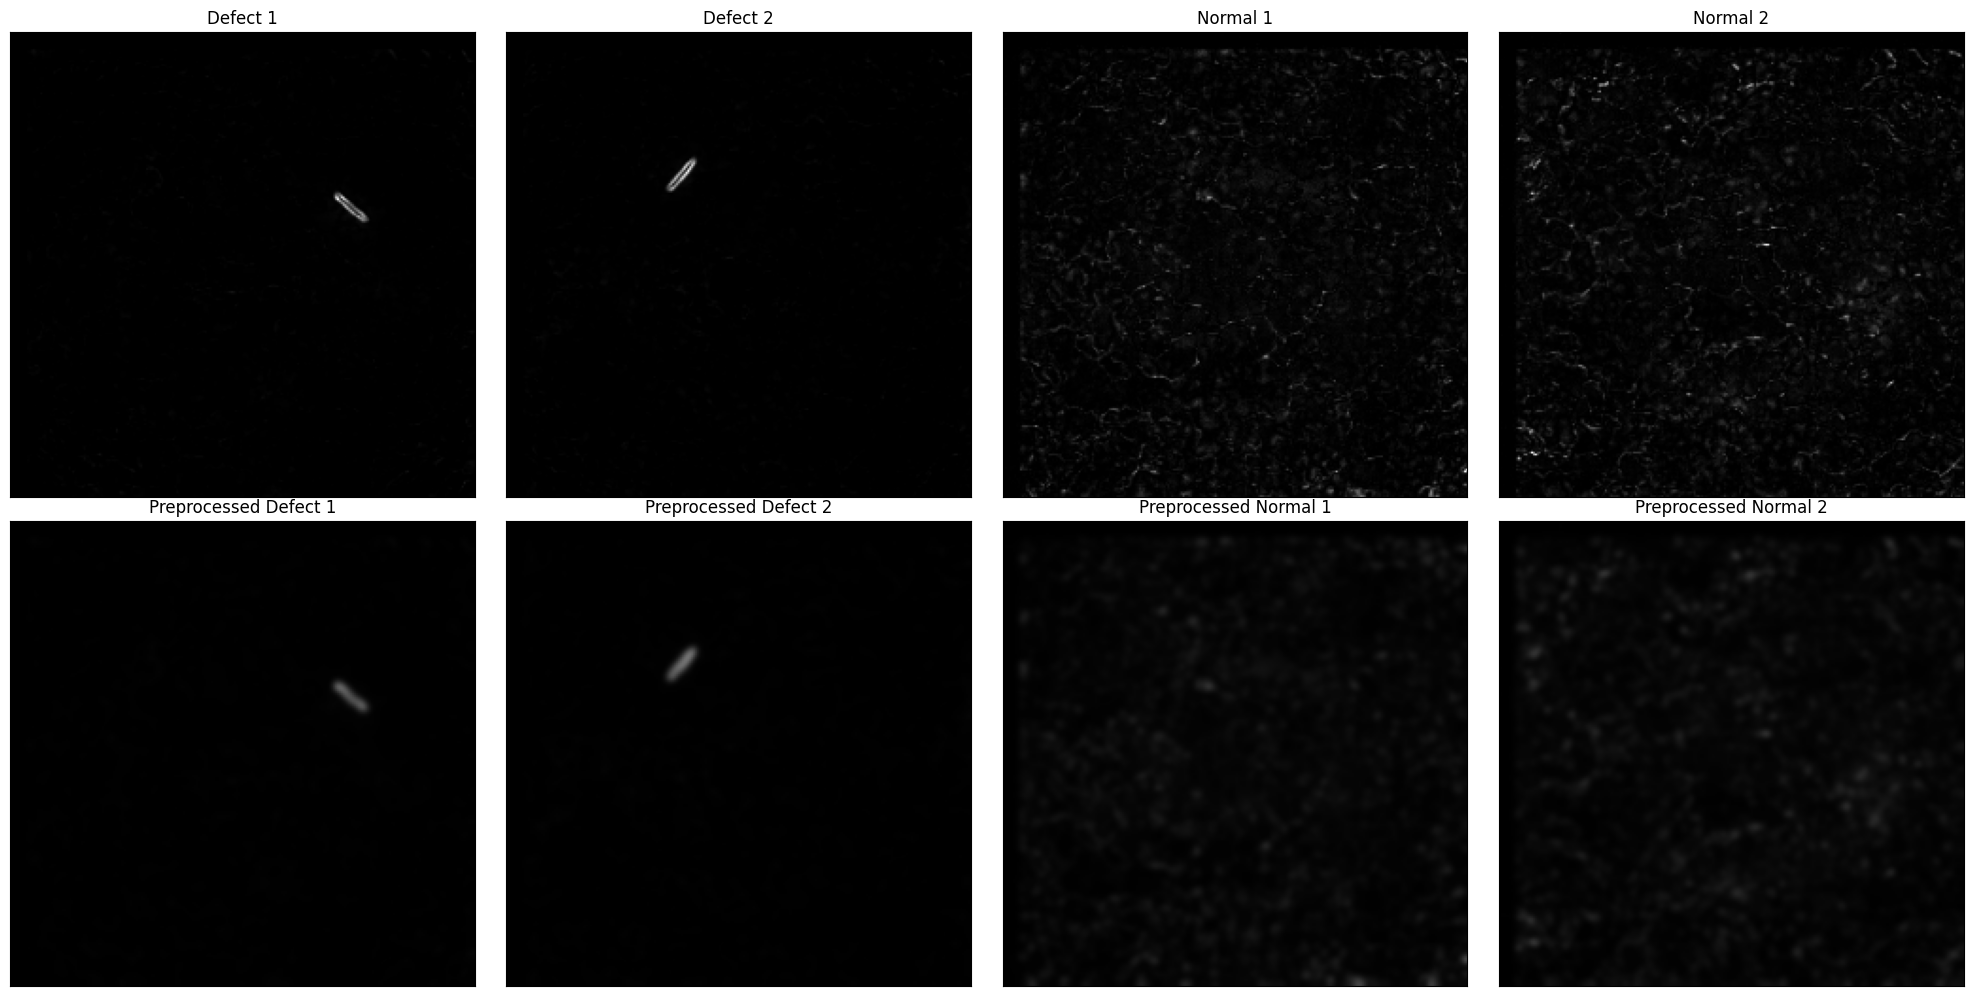

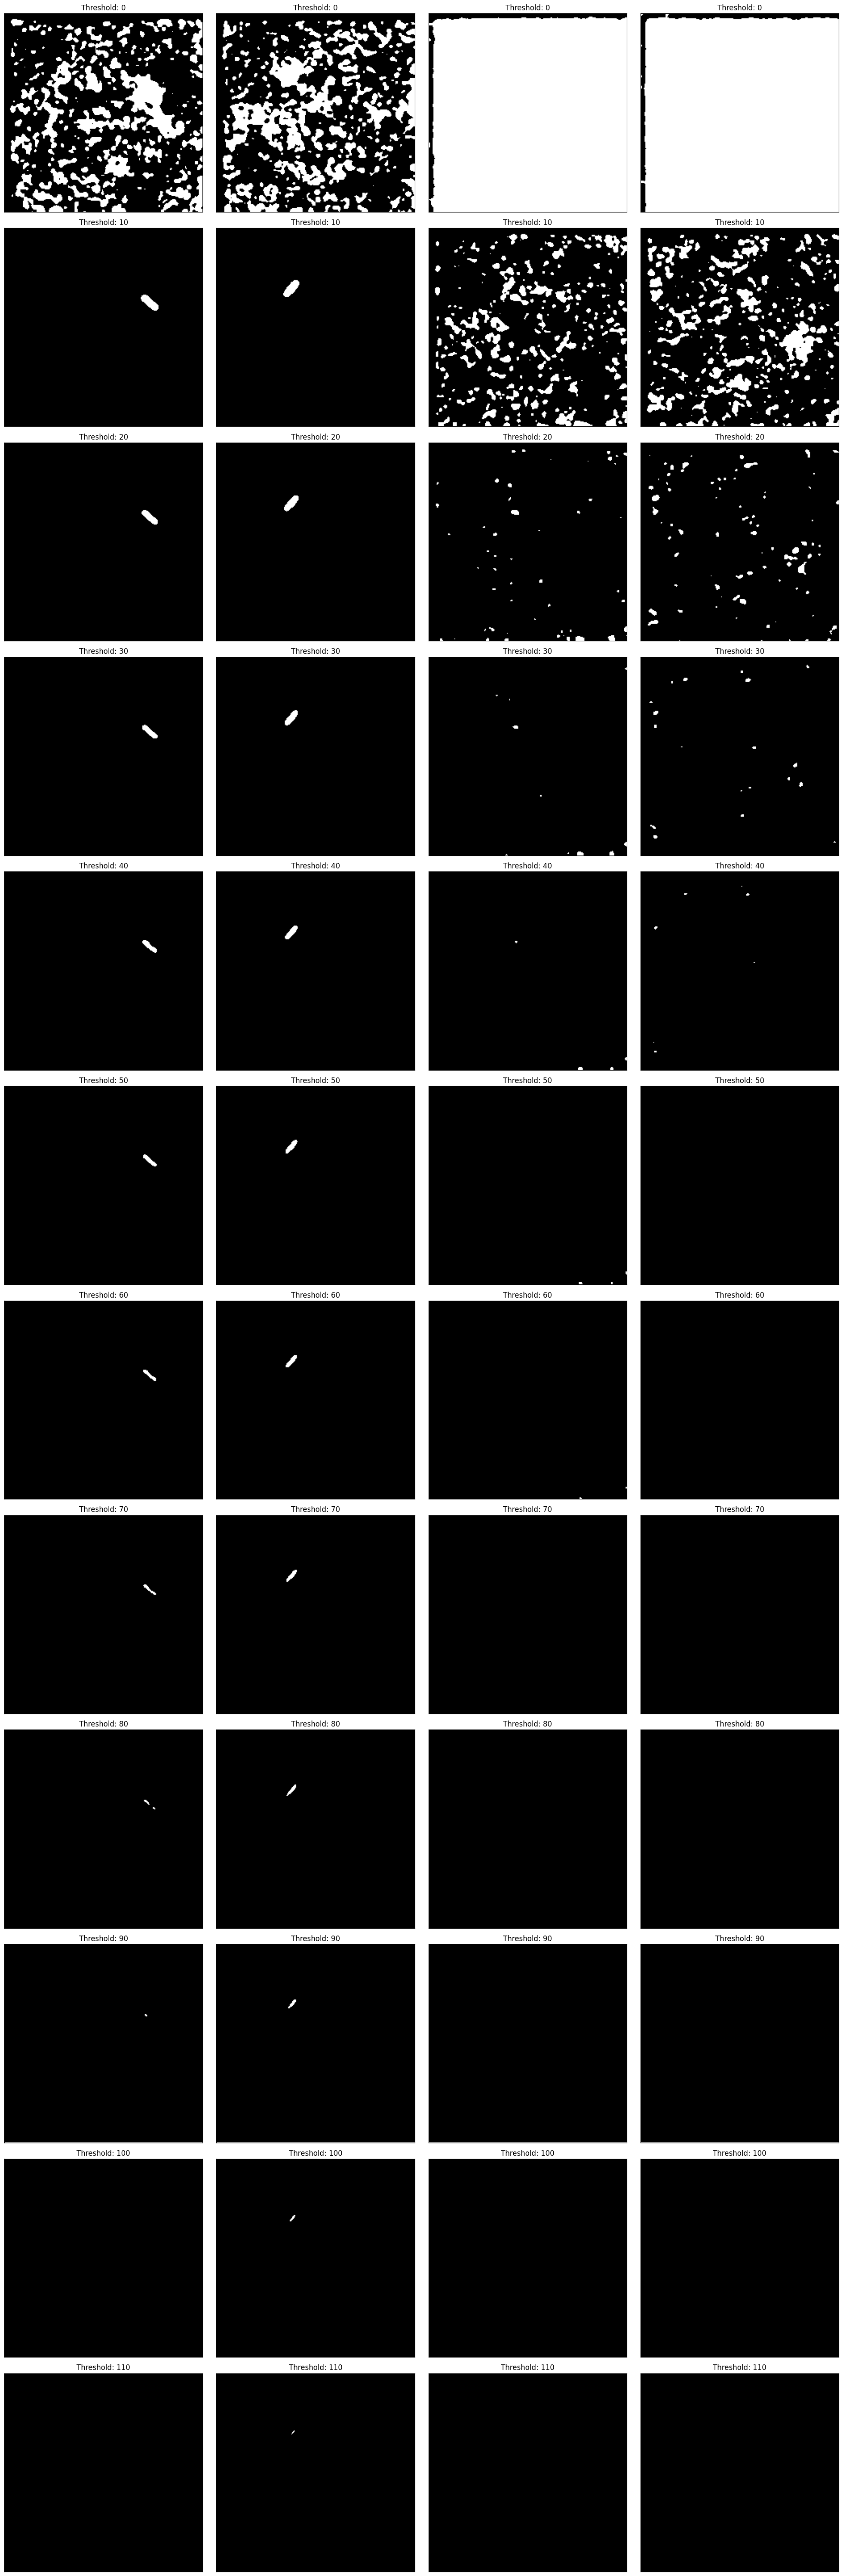

In [5]:
def preprocessing(image):
    # image = cv2.morphologyEx(image, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_OPEN, (3, 3)))
    # image = cv2.GaussianBlur(image, (5, 5), 0)
    image = cv2.GaussianBlur(image, (9,9), 0)
    return image

def threshold(image, threshold):
    image_threshold = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY )[1]
    return image_threshold

processed_images = []
for image in images:
    processed_images.append(preprocessing(image))


headers = ["Defect 1", "Defect 2", "Normal 1", "Normal 2"]
plot_images(images + processed_images, headers + ["Preprocessed " + header for header in headers], 0.1)

max_pixel_value = max([image.max() for image in processed_images])
filtered_images = []
titles = []
for i in range(0, max_pixel_value, 10):
    whitePixels = []    
    for image in processed_images:
        filtered_images.append(cv2.threshold(image, i, 255, cv2.THRESH_BINARY )[1])
        titles.append("Threshold: " + str(i))
    
plot_images(filtered_images, titles, 0.1)
    